###  Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

### Importing data

In [2]:
relative_path = os.path.join('..', 'exported cleaned csv files', 'police_data.csv')

# Construct the absolute path
absolute_path = os.path.abspath(relative_path)

# Read the CSV file into a DataFrame
df = pd.read_csv(absolute_path)

In [3]:
df

,case_id,stop_date,stopped_at,driver_gender,year_of_birth,driver_age,driver_race,stop_duration_in_minutes,violation,search_conducted,search_type,stop_outcome,is_arrested,drugs_related_stop,stopped_by
0,1,2005-08-28,01:00,Male,1979,26,White,23,Moving violation,Yes,Incident to Arrest-Protective Frisk,Arrest Driver,Yes,No,100
1,2,2005-10-01,00:00,Male,1988,17,White,23,Equipment,Yes,Probable Cause,Arrest Driver,Yes,Yes,101
2,3,2005-10-01,00:00,Male,1988,17,White,30,Equipment,Yes,Probable Cause,Citation,No,Yes,102
3,4,2005-10-02,09:30,Male,1975,30,White,30,Speeding,Yes,Incident to Arrest,Arrest Driver,Yes,No,103
4,5,2005-10-03,14:00,Male,1978,27,Black,23,Equipment,Yes,Probable Cause,Citation,No,No,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3189,2015-12-18,09:30,Male,1966,49,White,23,Registration/plates,Yes,Incident to Arrest,No Action,No,No,108
3189,3190,2015-12-21,01:39,Male,1986,29,White,7,Moving violation,Yes,Incident to Arrest,Citation,No,No,109
3190,3191,2015-12-28,11:05,Female,1996,19,White,23,Other,Yes,Incident to Arrest,Citation,No,Yes,100
3191,3192,2015-12-30,08:51,Female,1987,28,Hispanic,30,Speeding,Yes,Probable Cause-Reasonable Suspicion,Citation,No,Yes,101


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Graphs

#### Checking how many different race values our DataFrame contains

In [4]:
df.driver_race.value_counts()

White       1766
Black        789
Hispanic     584
Asian         51
Other          3
Name: driver_race, dtype: int64

#### Bar chart based on  different driver_race column

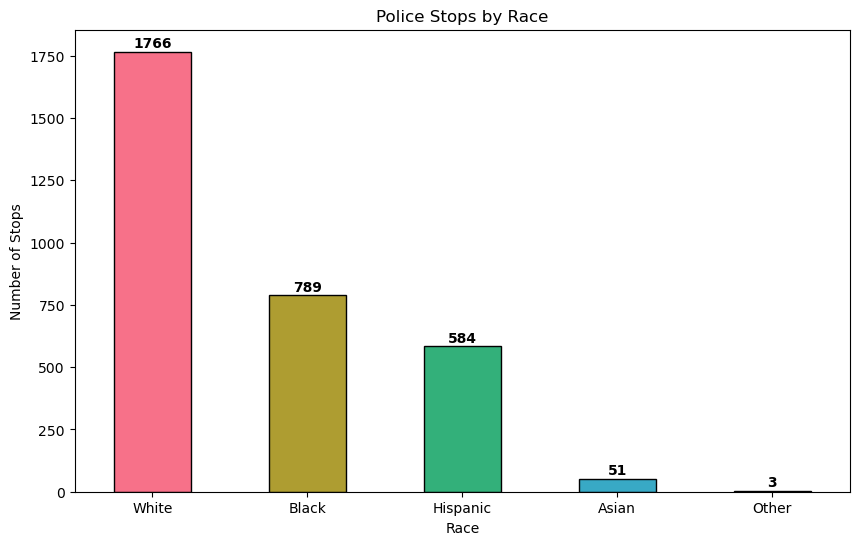

In [5]:
# Creating a custom color palette based on unique values in the 'race' column
race_colors = sns.color_palette('husl', n_colors=len(df['driver_race'].unique()))

# Plotting the bar chart using custom colors previously created
plt.figure(figsize=(10, 6))

# Plot the bar chart
ax = df['driver_race'].value_counts().plot(kind='bar', color=race_colors, edgecolor='black')

# Add numbers above the bars
for i, v in enumerate(df['driver_race'].value_counts()):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold', fontsize=10)

# Set plot title and labels
plt.title('Police Stops by Race')
plt.xlabel('Race')
plt.ylabel('Number of Stops')
plt.xticks(rotation=0)

# Show the plot
plt.show()

#### Checking how many different gender values our DataFrame contains

In [6]:
df.driver_gender.value_counts()

Male      2722
Female     471
Name: driver_gender, dtype: int64

#### Bar chart based on driver_gender column

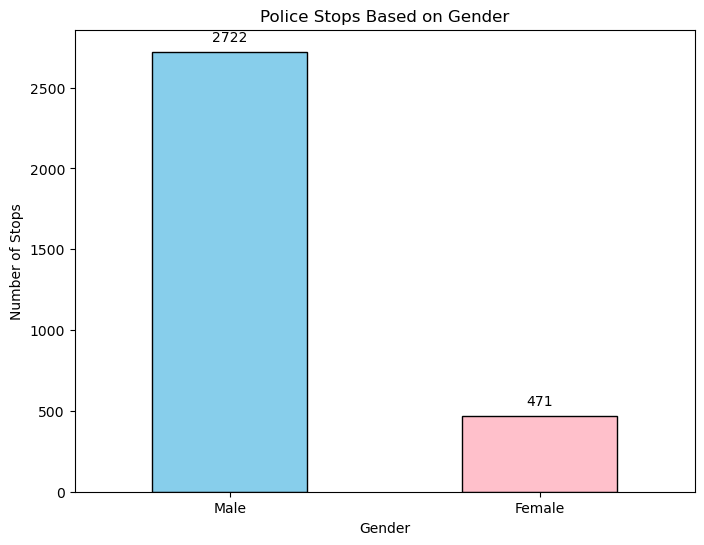

In [7]:
plt.figure(figsize=(8, 6))
bar_plot_gender = df['driver_gender'].value_counts().plot(kind='bar', color=['skyblue', 'pink'], edgecolor='black')  # Adding black outline
plt.title('Police Stops Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Stops')
plt.xticks(rotation=0)

# Optionally, you can add labels on top of the bars for better visibility
for p in bar_plot_gender.patches:
    bar_plot_gender.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

#### Horizontal Stacked Bar Chart of Police Stops Based on driver_gender and driver_age columns

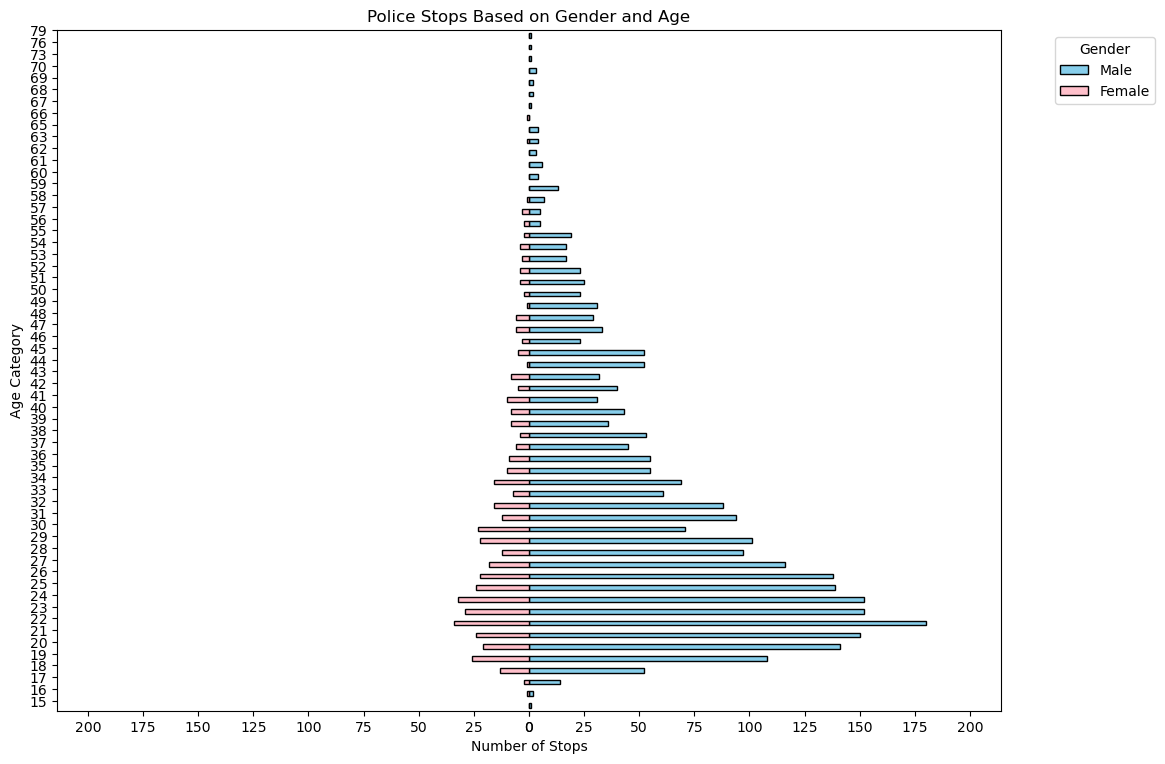

In [8]:
# Count the number of cases in each age and gender category
age_gender_counts = df.groupby(['driver_gender', 'driver_age']).size().unstack(fill_value=0)

# Reverse the order of age categories
age_gender_counts = age_gender_counts.loc[:, ::-1]

# Plotting the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Get the maximum count for each gender to adjust the plotting position
max_count_male = age_gender_counts.loc['Male'].max()
max_count_female = age_gender_counts.loc['Female'].max()

# Plotting the bars for male
male_bars = age_gender_counts.loc['Male'].plot(kind='barh', stacked=True, color='skyblue', edgecolor='black',
                                               position=0, width=0.4, ax=ax, align='edge')

# Plotting the bars for female
female_bars = age_gender_counts.loc['Female'].plot(kind='barh', stacked=True, color='pink', edgecolor='black',
                                                   position=0, width=0.4, ax=ax, align='edge', left=-age_gender_counts.loc['Female'])

plt.title('Police Stops Based on Gender and Age')
plt.xlabel('Number of Stops')
plt.ylabel('Age Category')

# Set the x-axis limits based on the maximum count
max_x_value = max_count_male + max_count_female
ax.set_xlim(-max_x_value, max_x_value)

# Set positive tick labels on both sides
tick_values = list(range(0, max_x_value + 1, 25))
ax.set_xticks([-x for x in tick_values] + tick_values)
ax.set_xticklabels([abs(x) for x in tick_values] + [str(x) for x in tick_values])

# Add padding between bars
ax.invert_yaxis()

# Explicitly set y-axis ticks and labels for age categories
ax.set_yticks(np.arange(len(age_gender_counts.columns)))
ax.set_yticklabels([str(age) for age in age_gender_counts.columns])

# Display the legend
ax.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(pad=2)
plt.show()

#### Histogram based on driver_age column to calculate frequency of stops by driver_age

#### Finding min and max driver_age values

In [9]:
min_age = df['driver_age'].min()

In [10]:
min_age

15

In [11]:
max_age = df['driver_age'].max()

In [12]:
max_age

79

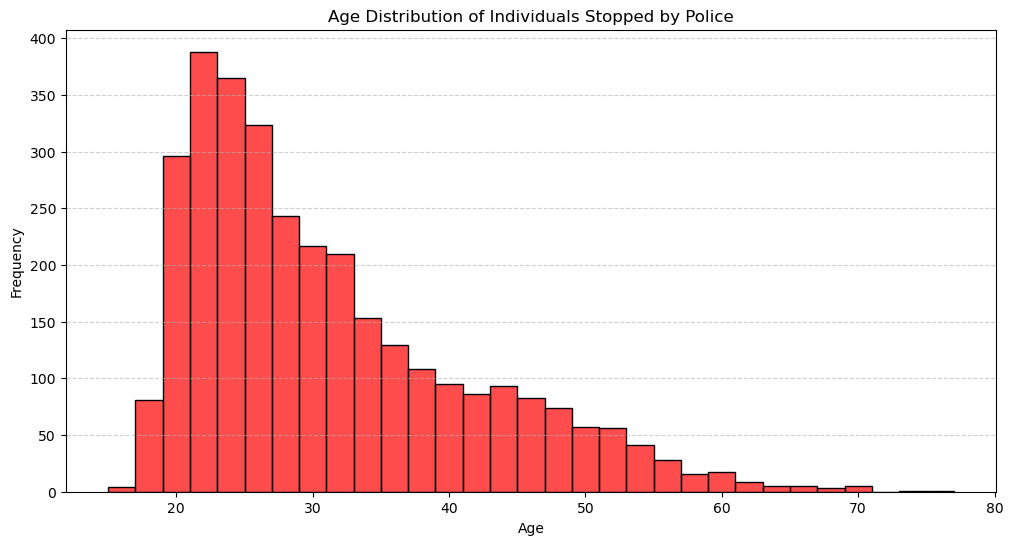

In [13]:
# Convert 'stop_date' column to datetime type
df['stop_date'] = pd.to_datetime(df['stop_date'])
df['year'] = df['stop_date'].dt.year

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(df['driver_age'], bins=range(15, 79, 2), color='red', edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Individuals Stopped by Police')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Pie chart based on stop_outcome column

#### Counting how many different stop outcomes DataFrame contains

In [14]:
df.stop_outcome.value_counts()

Citation            1907
Arrest Driver        951
Arrest Passenger     142
Warning              113
No Action             62
N/D                   18
Name: stop_outcome, dtype: int64

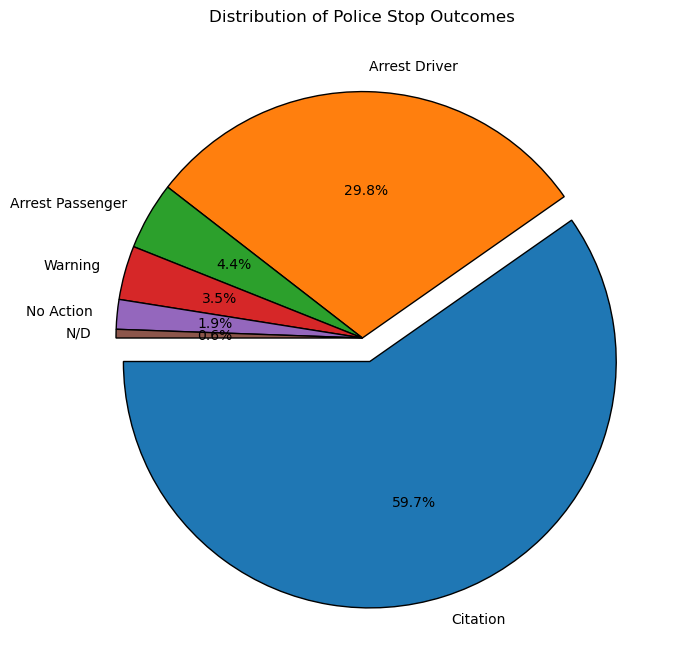

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(df['stop_outcome'].value_counts(), labels=df['stop_outcome'].value_counts().index,
        autopct='%1.1f%%', startangle=180, explode=(0.1, 0, 0, 0, 0, 0), wedgeprops=dict(edgecolor='black'))

plt.title('Distribution of Police Stop Outcomes')
plt.show()

#### Bar plot based on a year which is extracted from stop_date column

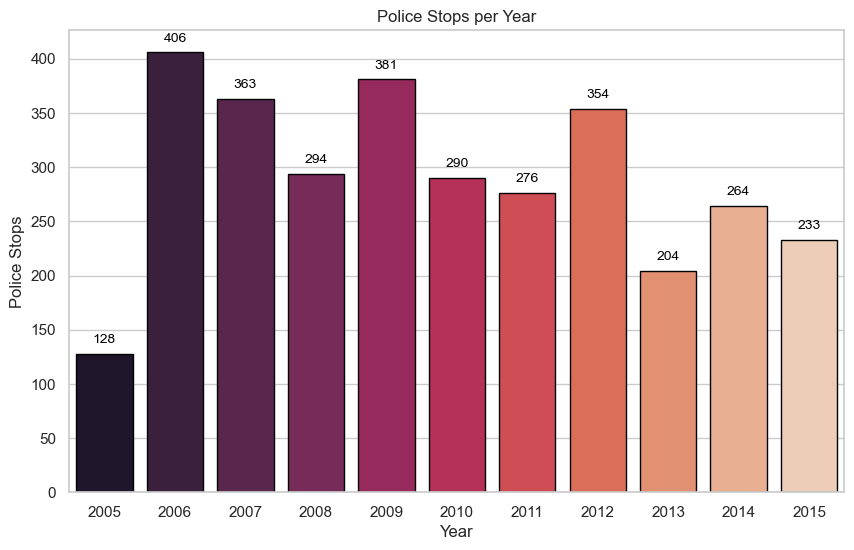

In [22]:
# Convert 'stop_date' column to datetime type
df['stop_date'] = pd.to_datetime(df['stop_date'])

# Extract the year from the date and create a new column 'Year'
df['Year'] = df['stop_date'].dt.year

# Count occurrences for each year
yearly_counts = df['Year'].value_counts().sort_index()

# Aggregate police stops per year
df_yearly = df.groupby('Year')['case_id'].count().reset_index()

# Set the style for Seaborn (optional)
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='case_id', data=df_yearly, palette='rocket', edgecolor='black')

# Display values above the bars
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:,.0f}', (p.get_x() + p.get_width() / 2., value),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

plt.title('Police Stops per Year')
plt.xlabel('Year')
plt.ylabel('Police Stops')
plt.show()

#### Bar chart based on is_arrested column

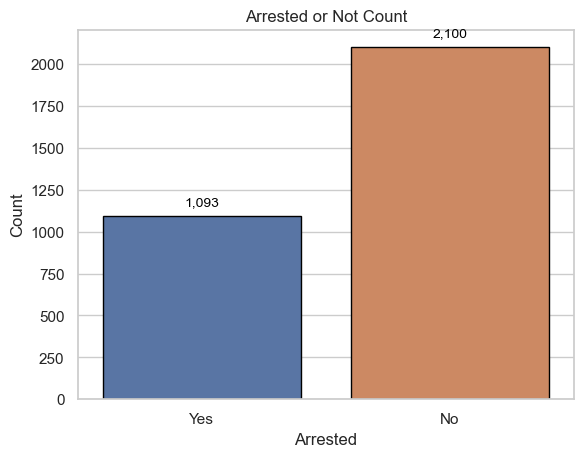

In [17]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a count plot for the 'is_arrested' column with black outline
ax = sns.countplot(x='is_arrested', data=df, edgecolor='black')

# Display values above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Set labels and title
plt.xlabel('Arrested')
plt.ylabel('Count')
plt.title('Arrested or Not Count')

# Show the plot
plt.show()

#### Bar chart based on drugs_related_stop column

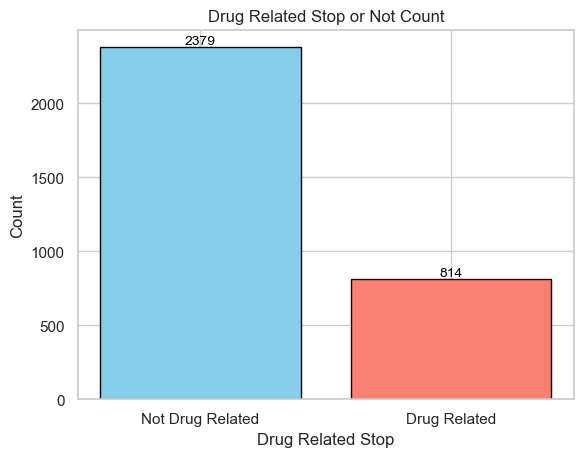

In [18]:
# Count the occurrences of each unique value in the 'drug_related_stop' column
counts = df['drugs_related_stop'].value_counts()

# Create a bar plot
fig, ax = plt.subplots()
bars = plt.bar(counts.index, counts.values, color=['skyblue', 'salmon'], edgecolor='black')

# Display values above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', fontsize=10, color='black')

# Set labels and title
plt.xlabel('Drug Related Stop')
plt.ylabel('Count')
plt.title('Drug Related Stop or Not Count')

# Set x-axis ticks and labels
plt.xticks([0, 1], ['Not Drug Related', 'Drug Related'])

# Show the plot
plt.show()